# Time Series Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [2]:
# Importing data
data = pd.read_csv(r'D:\Analytics portfolio\Time series analysis\monthly-beer-production-in-austr.csv', parse_dates=["Month"])

<AxesSubplot:xlabel='Month'>

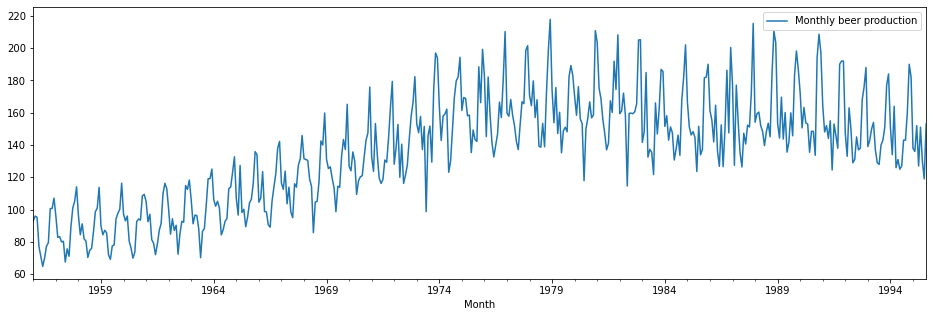

In [3]:
# PLot the data
fig, axs = plt.subplots(figsize = (16, 5))
data.plot('Month', 'Monthly beer production', ax = axs) # From the plot, it does not seem to have a outlier issue

In [4]:
# Missing values treatment
data.isna().any() # There is no missing value in the data

Month                      False
Monthly beer production    False
dtype: bool

In [5]:
# Keeping aside last 12 months data for future validation
train = data.iloc[: -12, :]
test = data.iloc[-12 : , :]

# ------------------------------------Forecast by decomposition-----------------------------

In [6]:
# Calculating the delta's for future use
train['del_yt'] = train['Monthly beer production'] - train['Monthly beer production'].shift(periods = 1)
train['del2_yt'] = train['del_yt'] - train['del_yt'].shift(periods = 1)
train['del3_yt'] = train['del2_yt'] - train['del2_yt'].shift(periods = 1)
train['del4_yt'] = train['del3_yt'] - train['del3_yt'].shift(periods = 1)
train['del5_yt'] = train['del4_yt'] - train['del4_yt'].shift(periods = 1)
train['del6_yt'] = train['del5_yt'] - train['del5_yt'].shift(periods = 1)
train['del7_yt'] = train['del6_yt'] - train['del6_yt'].shift(periods = 1)
train['del8_yt'] = train['del7_yt'] - train['del7_yt'].shift(periods = 1)
train['del9_yt'] = train['del8_yt'] - train['del8_yt'].shift(periods = 1)
train['del10_yt'] = train['del9_yt'] - train['del9_yt'].shift(periods = 1)
train['del11_yt'] = train['del10_yt'] - train['del10_yt'].shift(periods = 1)
train['del12_yt'] = train['del11_yt'] - train['del11_yt'].shift(periods = 1)

# There are 3 main components in time series 

## Trend, Seasonality and Random component

# Trend --------------------------------------

In [7]:
# Find the mid value of timeframe to use in model
mid_time_section = int(len(train)/2)
mid_month = train['Month'][mid_time_section]
train['time'] = train['Month'].apply(lambda x : (relativedelta(x, mid_month).years*12 + relativedelta(x, mid_month).months -1) if x <= mid_month else (relativedelta(x, mid_month).years*12 + relativedelta(x, mid_month).months))

## Linear Trend

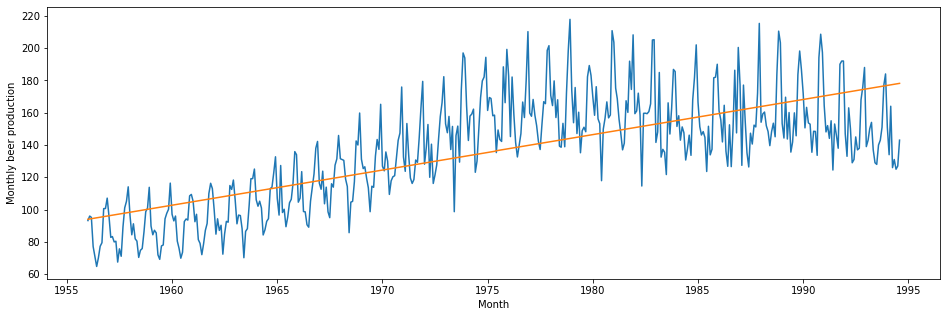

In [8]:
def linear_func(x, a, b):
    return a + b*x
ind = train['time']
dep = train['Monthly beer production']
train[['time', 'Monthly beer production']].corr()

a_estimated, b_estimated = curve_fit(f = linear_func, xdata = ind, ydata = dep, method = 'lm')

train['y_hat_linear'] = train['time'].apply(lambda x : a_estimated[0] + a_estimated[1]*x)

fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'Monthly beer production', ax = axs)
sns.lineplot(data = train, x = 'Month', y = 'y_hat_linear', ax = axs)
plt.show(block = False)

We can conclude that linear equation cannot capture the trend well as there is a decreasing trend after 1980

## Second degree parabola

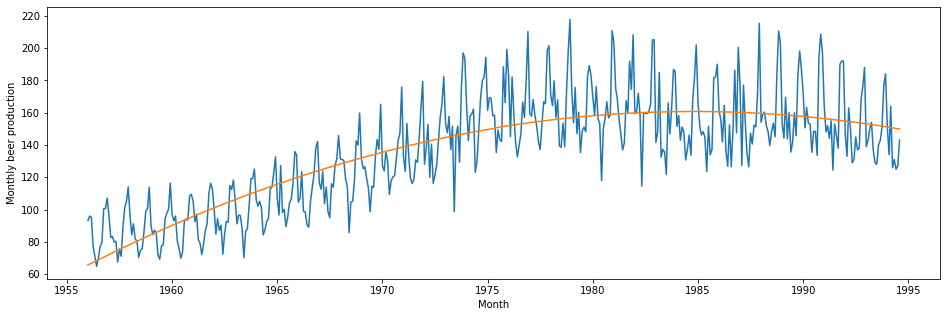

In [9]:
def second_degree_parabola_func(x, a, b, c):
    return a + b*x + c*(x**2)
ind = train['time']
dep = train['Monthly beer production']
a_estimated, b_estimated = curve_fit(f = second_degree_parabola_func, xdata = ind, ydata = dep, method = 'lm')

train['y_hat_2degreeParabola'] = train['time'].apply(lambda x : a_estimated[0] + a_estimated[1]*x + a_estimated[2]*(x**2))

fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'Monthly beer production', ax = axs)
sns.lineplot(data = train, x = 'Month', y = 'y_hat_2degreeParabola', ax = axs)
plt.show(block = False)

We can observe that 2nd degree parabola captures the trend better than linear model

## Third degree polynomial

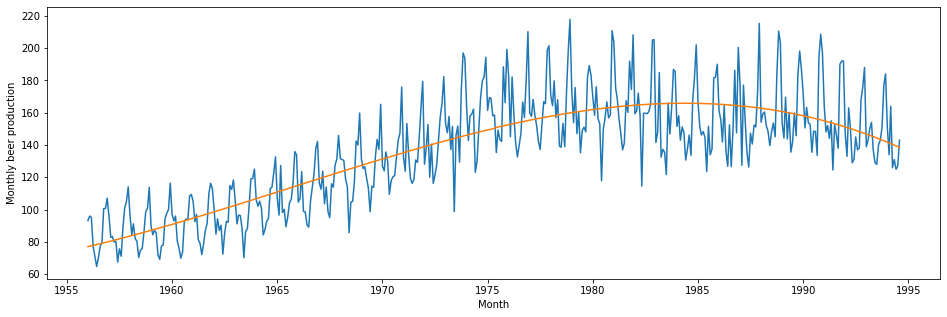

In [10]:
# Third degree polynomial
def third_degree_polynomial_func(x, a, b, c, d):
    return a + b*x + c*(x**2) + d*(x**3)
ind = train['time']
dep = train['Monthly beer production']

a_deg3poly, b_deg3poly = curve_fit(f = third_degree_polynomial_func, xdata = ind, ydata = dep, method = 'lm')

train['y_hat_3degreePolynomial'] = train['time'].apply(lambda x : a_deg3poly[0] + a_deg3poly[1]*x + a_deg3poly[2]*(x**2) + a_deg3poly[3]*(x**3))

fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'Monthly beer production', ax = axs)
sns.lineplot(data = train, x = 'Month', y = 'y_hat_3degreePolynomial', ax = axs)
plt.show(block = False)

We can observe that 3rd degree polynomial equation fits better than 2nd degree parabolic equation

# Fourth degree polynomial

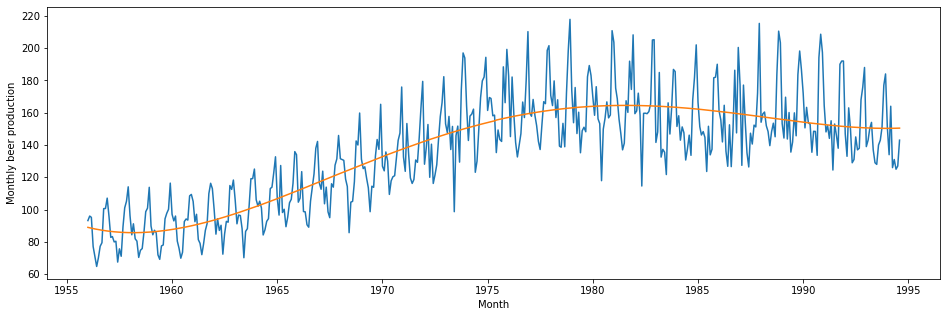

In [11]:
# Fourth degree polynomial
def fourth_degree_polynomial_func(x, a, b, c, d, e):
    return a + b*x + c*(x**2) + d*(x**3) + e*(x**4)
ind = train['time']
dep = train['Monthly beer production']

a_deg4poly, b_deg4poly = curve_fit(f = fourth_degree_polynomial_func, xdata = ind, ydata = dep, method = 'lm')

train['y_hat_4degreePolynomial'] = train['time'].apply(lambda x : a_deg4poly[0] + a_deg4poly[1]*x + a_deg4poly[2]*(x**2) + a_deg4poly[3]*(x**3) + a_deg4poly[4]*(x**4))

fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'Monthly beer production', ax = axs)
sns.lineplot(data = train, x = 'Month', y = 'y_hat_4degreePolynomial', ax = axs)
plt.show(block = False)

We can observe that 4th degree polynomial equation can capture the trend very well.

## Moving average (Simple moving average)

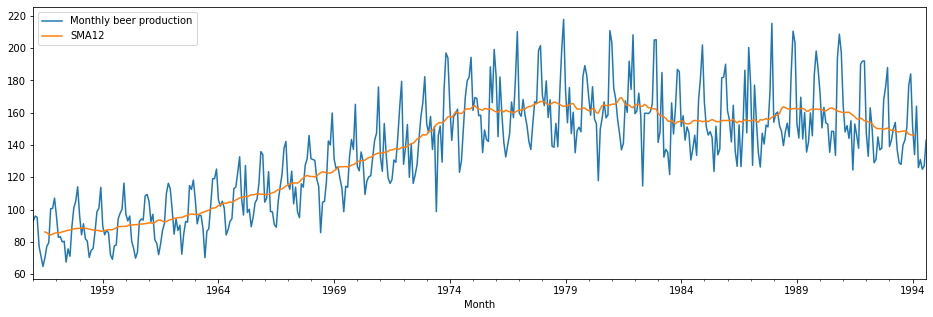

In [12]:
total_train_len = len(train)
i = 0
window = 12
ls = []
sma = []
while i + window <= total_train_len:
    a = train['Monthly beer production'][i : i+ window].mean()
    ls.append(a)
    i+=1

i = 0
window_sub = 2
while i + window_sub <= len(ls):
    a = np.mean(ls[i : i+ window_sub])
    sma.append(a)
    i+=1

sma.extend([np.nan]*12)
train['SMA12'] = sma
train['SMA12'] = train['SMA12'].shift(periods = 6)

fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'SMA12', ax = axs)
plt.show(block = False)

## Moving average (Cumulative moving average)

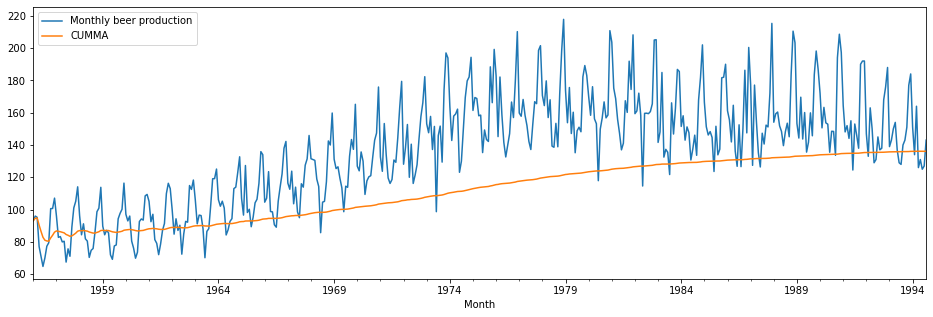

In [13]:
ls= []
i = 1
while i <= total_train_len:
    ls.append(train['Monthly beer production'][0:i].mean())
    i+=1

train['CUMMA'] = ls

fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'CUMMA', ax = axs)
plt.show(block = False)

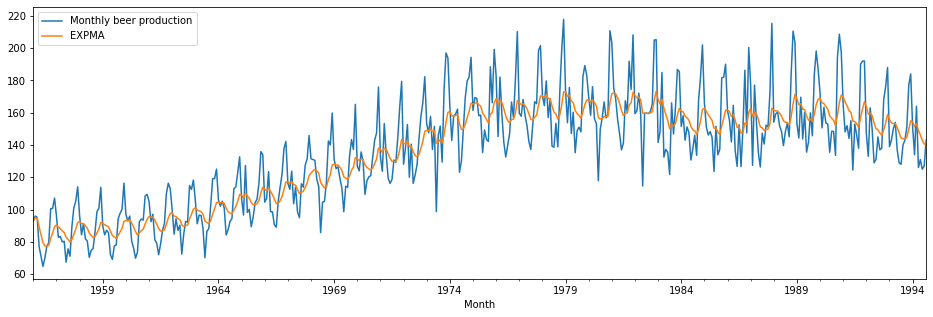

In [14]:
train['EXPMA'] = train['Monthly beer production'].ewm(span = 12).mean()


fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'EXPMA', ax = axs)
plt.show(block = False)

# Seasonal Decomposation--------------------------------------

## By 3rd degree polynomial (Assuming multiplicative model)

In [15]:
train['Months'] = train['Month'].dt.month

In [16]:
# Seasonal decomposition
# From 3rd degree polinomial (Assuming multiplicative model)
train = train.assign(deg3PolyMulti = lambda x : (x['Monthly beer production']/x['y_hat_3degreePolynomial'])*100)

deg3PolyMultiGrp = train[['Months', 'deg3PolyMulti']].groupby('Months').mean().reset_index()
correction_factor = 1200/deg3PolyMultiGrp.deg3PolyMulti.sum()

deg3PolyMultiGrp.deg3PolyMulti = deg3PolyMultiGrp.deg3PolyMulti.apply(lambda x : x*correction_factor)

train.drop('deg3PolyMulti', axis = 1, inplace = True)
train = train.merge(deg3PolyMultiGrp, on = 'Months', how = 'left')
train['deg3predictMulti'] = train['y_hat_3degreePolynomial'] * train['deg3PolyMulti']/100

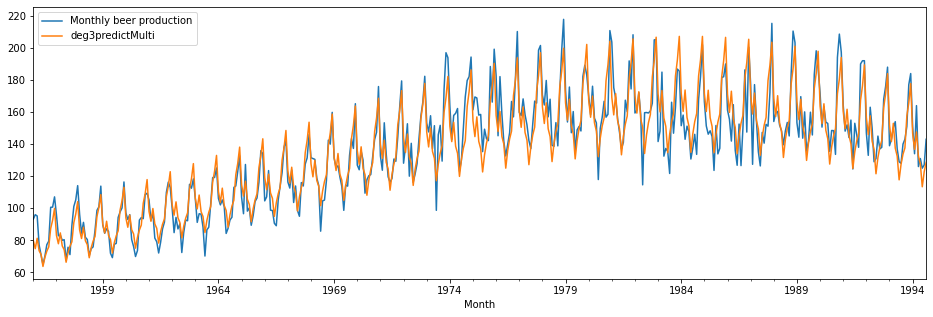

In [17]:
# Prediction on training data
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'deg3predictMulti', ax = axs)
plt.show(block = False)

Calculating Forecast value for test data

In [18]:
# Forecasting on test data
test['trendPoly3'] = test['Monthly beer production'].apply(lambda x : a_deg3poly[0] + a_deg3poly[1]*x + a_deg3poly[2]*(x**2) + a_deg3poly[3]*(x**3))
test['Months'] = test.Month.dt.month
test = test.merge(deg3PolyMultiGrp, on = 'Months', how = 'left')
test['ForecastPoly3Multi'] = test['trendPoly3'] * test['deg3PolyMulti']/100

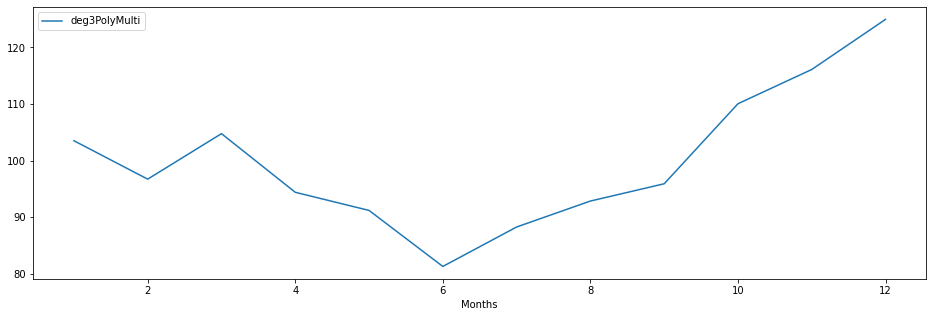

In [19]:
# Seasonal indices (12 months by 3rd degree polynomial)
fig, axs = plt.subplots(figsize = (16, 5))
deg3PolyMultiGrp.plot('Months', 'deg3PolyMulti', ax = axs)
plt.show(block = False)

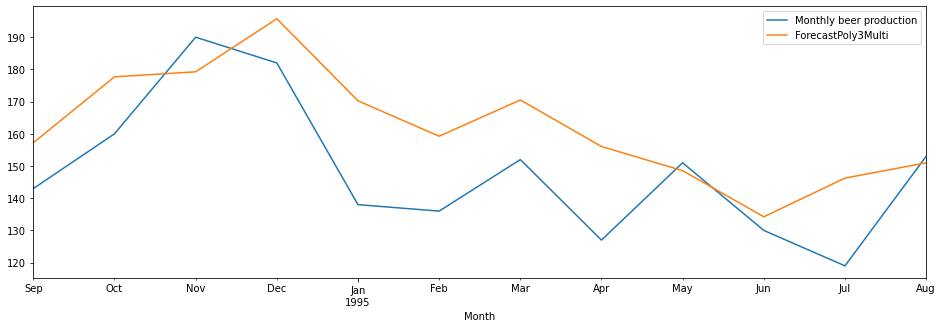

In [21]:
# Plot of predicted and actual vaues in test data
fig, axs = plt.subplots(figsize = (16, 5))
test.plot('Month', 'Monthly beer production', ax = axs)
test.plot('Month', 'ForecastPoly3Multi', ax = axs)
plt.show(block = False)

In [22]:
# RMSE from training data
train.apply(lambda x : (x['Monthly beer production'] - x['deg3predictMulti'])**2, axis = 1).mean()**(1/2)

10.782272172738963

In [23]:
# RMSE from test data
test.apply(lambda x : (x['Monthly beer production'] - x['ForecastPoly3Multi'])**2, axis = 1).mean()**(1/2)

19.051859295706542

## By 3rd degree polynomial (Assuming additive model)

In [24]:
train = train.assign(deg3PolyAdd = lambda x : (x['Monthly beer production'] - x['y_hat_3degreePolynomial']))
deg3PolyAddGrp = train[['Months', 'deg3PolyAdd']].groupby('Months').mean().reset_index()

correctionFactorAdditive = deg3PolyAddGrp.deg3PolyAdd.sum()/12

deg3PolyAddGrp.deg3PolyAdd = deg3PolyAddGrp.deg3PolyAdd.apply(lambda x : x-correctionFactorAdditive)

train.drop('deg3PolyAdd', axis = 1, inplace = True)
train = train.merge(deg3PolyAddGrp, on = 'Months', how = 'left')
train['deg3predictAdd'] = train['y_hat_3degreePolynomial'] + train['deg3PolyAdd']

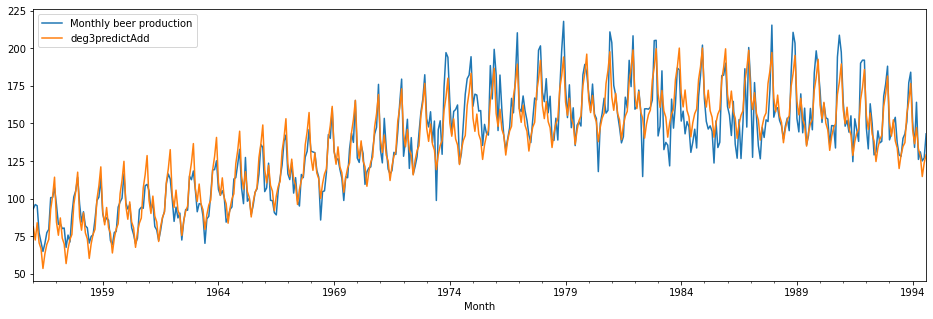

In [25]:
# Prediction on training data
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'deg3predictAdd', ax = axs)
plt.show(block = False)

In [26]:
# Forecasting on test data
test['trendPoly3'] = test['Monthly beer production'].apply(lambda x : a_deg3poly[0] + a_deg3poly[1]*x + a_deg3poly[2]*(x**2) + a_deg3poly[3]*(x**3))
test['Months'] = test.Month.dt.month
test = test.merge(deg3PolyAddGrp, on = 'Months', how = 'left')
test['ForecastPoly3Add'] = test['trendPoly3'] + test['deg3PolyAdd']

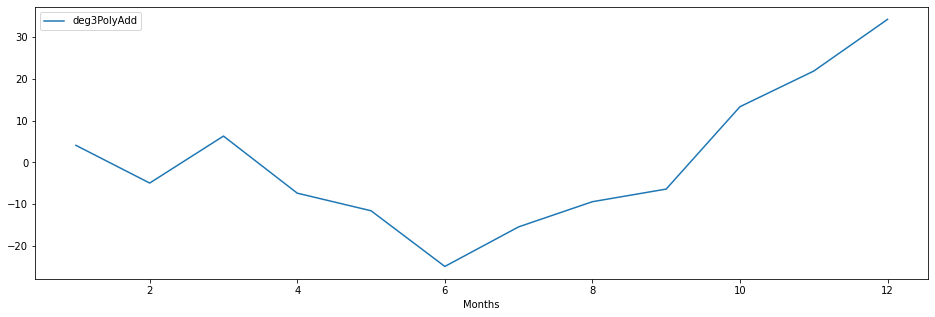

In [27]:
# Seasonal indices (12 months by 3rd degree polynomial)
fig, axs = plt.subplots(figsize = (16, 5))
deg3PolyAddGrp.plot('Months', 'deg3PolyAdd', ax = axs)
plt.show(block = False)

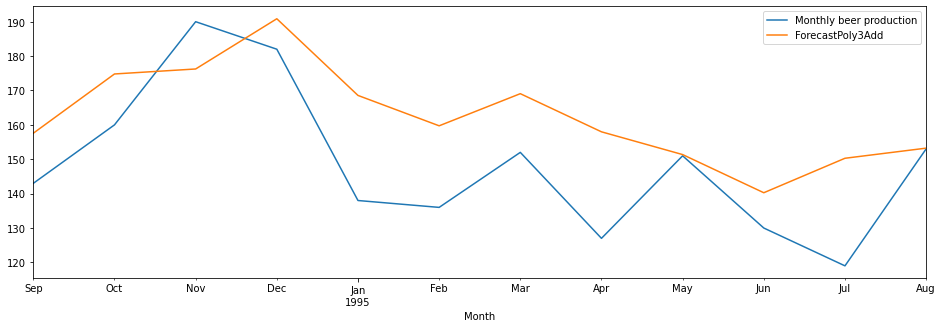

In [28]:
# Plot of predicted and actual vaues in test data
fig, axs = plt.subplots(figsize = (16, 5))
test.plot('Month', 'Monthly beer production', ax = axs)
test.plot('Month', 'ForecastPoly3Add', ax = axs)
plt.show(block = False)

In [29]:
# RMSE from training data
train.apply(lambda x : (x['Monthly beer production'] - x['deg3predictAdd'])**2, axis = 1).mean()**(1/2)

10.999700938117723

In [30]:
# RMSE from test data
test.apply(lambda x : (x['Monthly beer production'] - x['ForecastPoly3Add'])**2, axis = 1).mean()**(1/2)

19.431112719997657

## By 4th degree polynomial (Assuming multiplicative model)

In [32]:
# Seasonal decomposition
# From 4th degree polinomial (Assuming multiplicative model)
train = train.assign(deg4PolyMulti = lambda x : (x['Monthly beer production']/x['y_hat_4degreePolynomial'])*100)

deg4PolyMultiGrp = train[['Months', 'deg4PolyMulti']].groupby('Months').mean().reset_index()
correction_factor = 1200/deg4PolyMultiGrp.deg4PolyMulti.sum()

deg4PolyMultiGrp.deg4PolyMulti = deg4PolyMultiGrp.deg4PolyMulti.apply(lambda x : x*correction_factor)

train.drop('deg4PolyMulti', axis = 1, inplace = True)
train = train.merge(deg4PolyMultiGrp, on = 'Months', how = 'left')
train['deg4predictMulti'] = train['y_hat_4degreePolynomial'] * train['deg4PolyMulti']/100

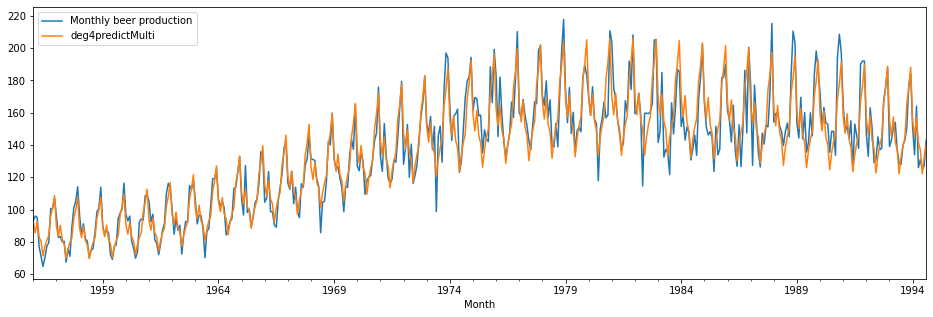

In [33]:
# Prediction on training data
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'deg4predictMulti', ax = axs)
plt.show(block = False)

In [34]:
# Forecasting test data
test['trendPoly4'] = test['Monthly beer production'].apply(lambda x : a_deg4poly[0] + a_deg4poly[1]*x + a_deg4poly[2]*(x**2) + a_deg4poly[3]*(x**3) + a_deg4poly[4]*(x**4))
test['Months'] = test.Month.dt.month
test = test.merge(deg4PolyMultiGrp, on = 'Months', how = 'left')
test['ForecastPoly4'] = test['trendPoly4'] * test['deg4PolyMulti']/100

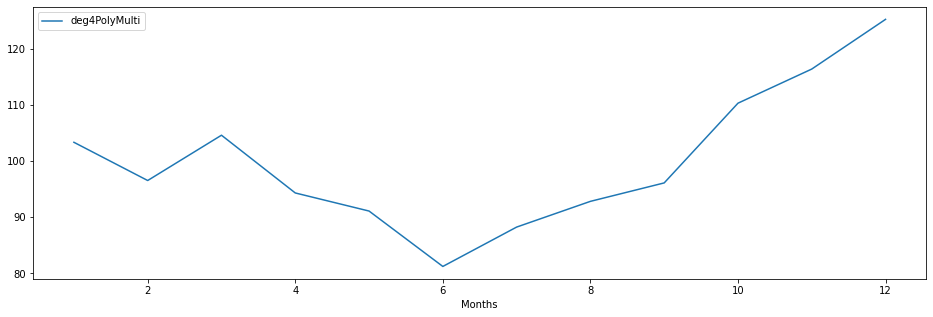

In [35]:
# Seasonal indices (12 months by 4th degree polynomial)
fig, axs = plt.subplots(figsize = (16, 5))
deg4PolyMultiGrp.plot('Months', 'deg4PolyMulti', ax = axs)
plt.show(block = False)

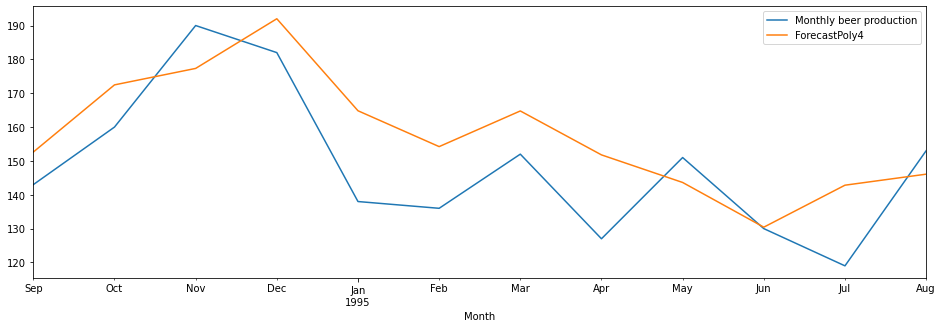

In [36]:
# Plot of predicted and actual vaues in test data
fig, axs = plt.subplots(figsize = (16, 5))
test.plot('Month', 'Monthly beer production', ax = axs)
test.plot('Month', 'ForecastPoly4', ax = axs)
plt.show(block = False)

In [37]:
# RMSE from training data
train.apply(lambda x : (x['Monthly beer production'] - x['deg4predict'])**2, axis = 1).mean()**(1/2)

9.845876988488042

In [38]:
# RMSE from test data
test.apply(lambda x : (x['Monthly beer production'] - x['ForecastPoly4'])**2, axis = 1).mean()**(1/2)

15.830601228286673

# By 4th degree polynomial (Assuming additive model)

In [39]:
train = train.assign(deg4PolyAdd = lambda x : (x['Monthly beer production'] - x['y_hat_4degreePolynomial']))
deg4PolyAddGrp = train[['Months', 'deg4PolyAdd']].groupby('Months').mean().reset_index()

correctionFactorAdditive = deg4PolyAddGrp.deg4PolyAdd.sum()/12

deg4PolyAddGrp.deg4PolyAdd = deg4PolyAddGrp.deg4PolyAdd.apply(lambda x : x-correctionFactorAdditive)

train.drop('deg4PolyAdd', axis = 1, inplace = True)
train = train.merge(deg4PolyAddGrp, on = 'Months', how = 'left')
train['deg4predictAdd'] = train['y_hat_4degreePolynomial'] + train['deg4PolyAdd']

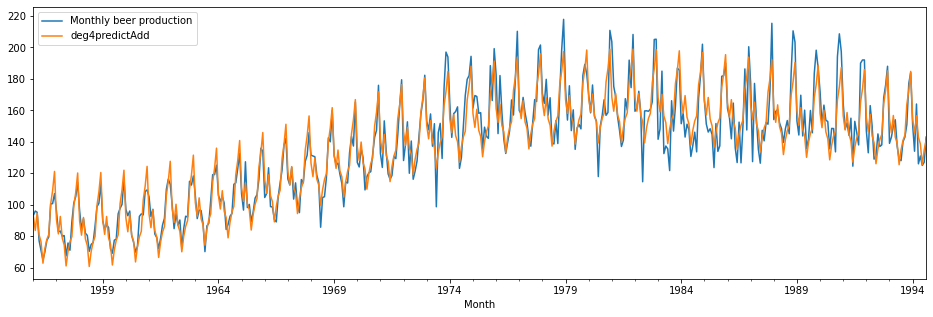

In [40]:
# Prediction on training data
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'deg4predictAdd', ax = axs)
plt.show(block = False)

In [41]:
# Forecasting on test data
test['trendPoly4'] = test['Monthly beer production'].apply(lambda x : a_deg4poly[0] + a_deg4poly[1]*x + a_deg4poly[2]*(x**2) + a_deg4poly[3]*(x**3) + a_deg4poly[4]*(x**4))
test['Months'] = test.Month.dt.month
test = test.merge(deg4PolyAddGrp, on = 'Months', how = 'left')
test['ForecastPoly4Add'] = test['trendPoly4'] + test['deg4PolyAdd']

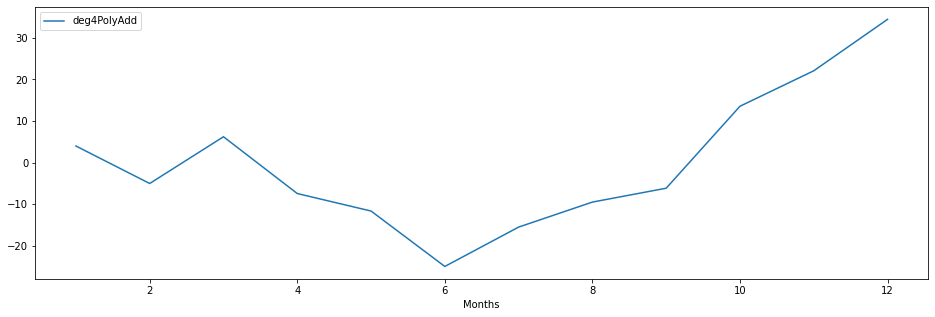

In [42]:
# Seasonal indices (12 months by 4th degree polynomial)
fig, axs = plt.subplots(figsize = (16, 5))
deg4PolyAddGrp.plot('Months', 'deg4PolyAdd', ax = axs)
plt.show(block = False)

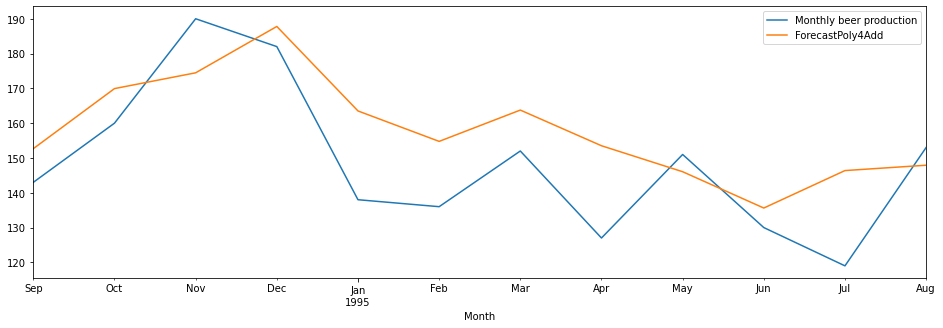

In [43]:
# Plot of predicted and actual vaues in test data
fig, axs = plt.subplots(figsize = (16, 5))
test.plot('Month', 'Monthly beer production', ax = axs)
test.plot('Month', 'ForecastPoly4Add', ax = axs)
plt.show(block = False)

In [44]:
# RMSE from training data
train.apply(lambda x : (x['Monthly beer production'] - x['deg4predictAdd'])**2, axis = 1).mean()**(1/2)

10.065718522868021

In [45]:
# RMSE from test data
test.apply(lambda x : (x['Monthly beer production'] - x['ForecastPoly4Add'])**2, axis = 1).mean()**(1/2)

16.18172262281024

# -----------------------------------Random Component--------------------------------------------

## We cannot predict or calculate random components, But we can estimate the variance of this

Formula from variate difference in time series - By G. Titner

In [44]:
denominatorDel1 = len(train) - train['del_yt'].isna().sum()
denominatorDel2 = len(train) - train['del2_yt'].isna().sum()
denominatorDel3 = len(train) - train['del3_yt'].isna().sum()
denominatorDel4 = len(train) - train['del4_yt'].isna().sum()

mu2Del1 = train[~train['del_yt'].isna()]['del_yt'].apply(lambda x : x**2).sum()/denominatorDel1
mu2Del2 = train[~train['del2_yt'].isna()]['del2_yt'].apply(lambda x : x**2).sum()/denominatorDel2
mu2Del3 = train[~train['del3_yt'].isna()]['del3_yt'].apply(lambda x : x**2).sum()/denominatorDel3
mu2Del4 = train[~train['del4_yt'].isna()]['del4_yt'].apply(lambda x : x**2).sum()/denominatorDel4

v1 = mu2Del1/(math.comb(2,1))
v2 = mu2Del2/(math.comb(4,2))
v3 = mu2Del3/(math.comb(6,3))
v4 = mu2Del4/(math.comb(8,4))

print('V1 is : %d, V2 is: %d, V3 is: %d, V4 is : %d'%(v1, v2, v3, v4))

V1 is : 190, V2 is: 156, V3 is: 145, V4 is : 139


In [45]:
# From here we can conclude that third or 4th polynomial was chosen correctly as there is no significance difference between them

# Check white noise (For only multiplicative models)

In [46]:
# Residual from 3rd degree polynomial prediction
train['residual3'] = train['Monthly beer production'] - train['deg3predictMulti']

In [47]:
# Residual from 4th degree polynomial prediction
train['residual4'] = train['Monthly beer production'] - train['deg4predictMulti']

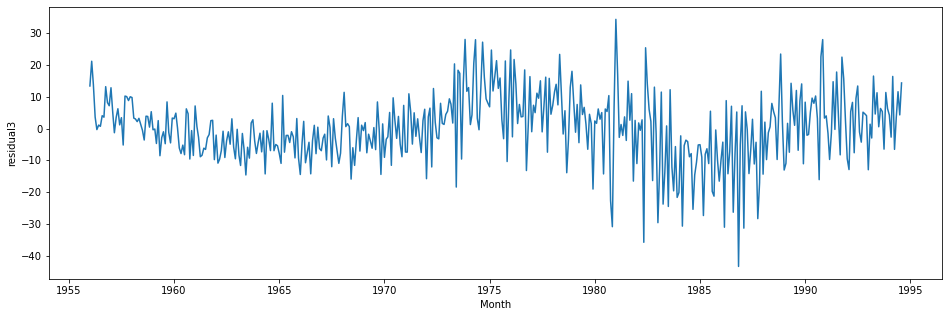

In [48]:
# Residual plot (3rd degree polynomial)
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'residual3', ax = axs)
plt.show(block = False)

In [56]:
# It is clearly seen that there is a clear pattern in the residual plot and variance is not constant. So, it is not white noise.

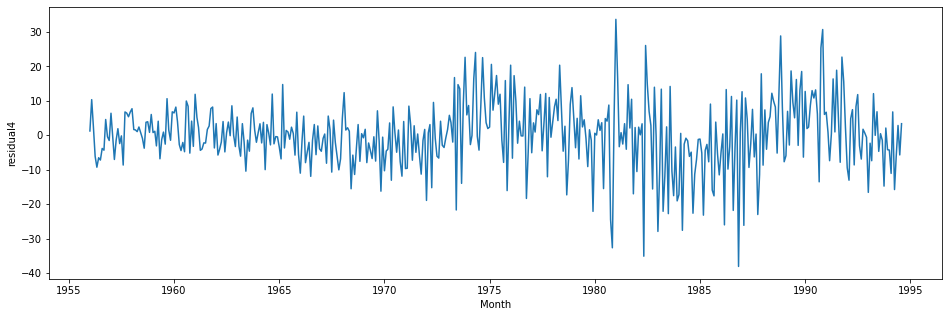

In [49]:
# Residual plot (4th degree polinomial prediction)
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = train, x = 'Month', y = 'residual4', ax = axs)
plt.show(block = False)

In [57]:
# It is clearly seen that there is a clear pattern in the residual plot and variance is not constant. So, it is not white noise.

In [50]:
# Global mean (3rd degree)
train['residual3'].mean()

0.11459759410050913

In [51]:
# Global mean (4th degree)
train['residual4'].mean()

0.12871557931328326

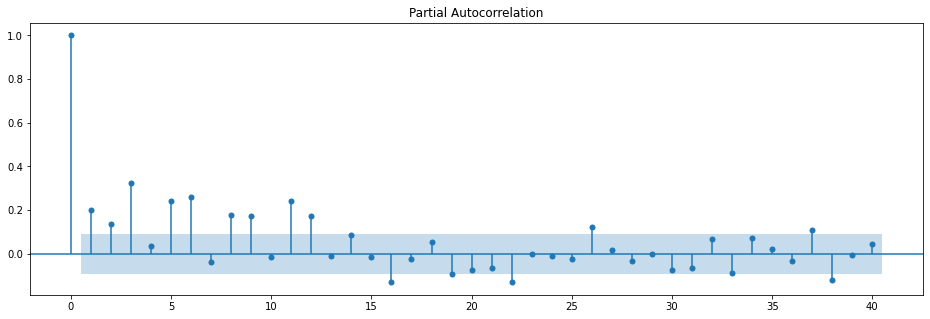

In [58]:
# PACF plot of residual (3rd degree)
fig, axs = plt.subplots(figsize = (16, 5))
plot_pacf(train['residual3'], ax = axs, lags = 40)
plt.show(block = False)

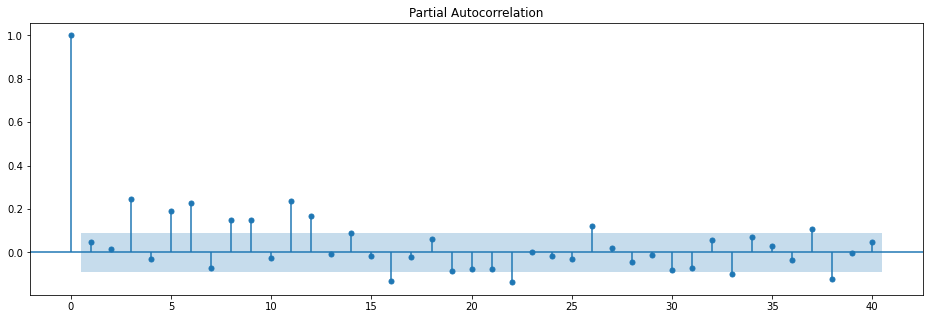

In [53]:
# PACF plot of residual (4th degree)
fig, axs = plt.subplots(figsize = (16, 5))
plot_pacf(train['residual4'], ax = axs, lags = 40)
plt.show(block = False)

In [54]:
# ADF test (3rd degree)
adfPoly3 = adfuller(x = train['residual3'])

In [55]:
adfPoly3

(-1.7758102190500105,
 0.3925356434306517,
 15,
 448,
 {'1%': -3.4450311708077743,
  '5%': -2.8680131035505023,
  '10%': -2.570217924306441},
 3208.34570329285)

In [56]:
# ADF test (4th degree)
adfPoly4 = adfuller(x = train['residual4'])

In [57]:
adfPoly4

(-2.41661305244886,
 0.13710229176234628,
 15,
 448,
 {'1%': -3.4450311708077743,
  '5%': -2.8680131035505023,
  '10%': -2.570217924306441},
 3204.018126065721)

We have found out that forecasting with decomposition is giving good result in terms of prediction but the residual is not white noise.
So, we will try another sophisticated method for forecasting.

# --------------------------------------Forecast by statistical model-----------------------------

## Checking correlogram

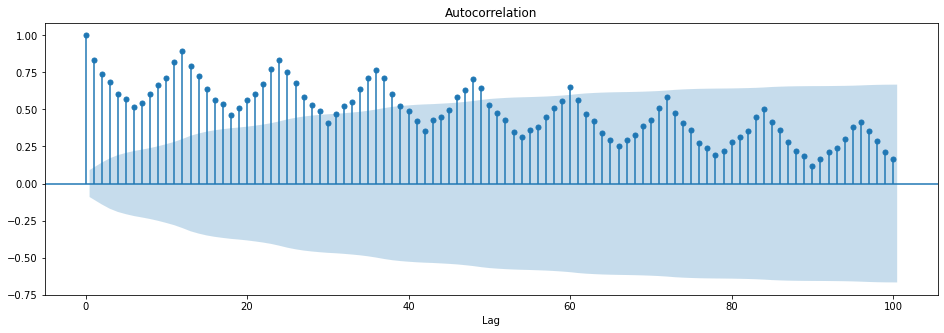

In [59]:
# Auto Correlation plot
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['Monthly beer production'], ax = axs, lags = 100)
plt.xlabel('Lag')
plt.show(block = False)

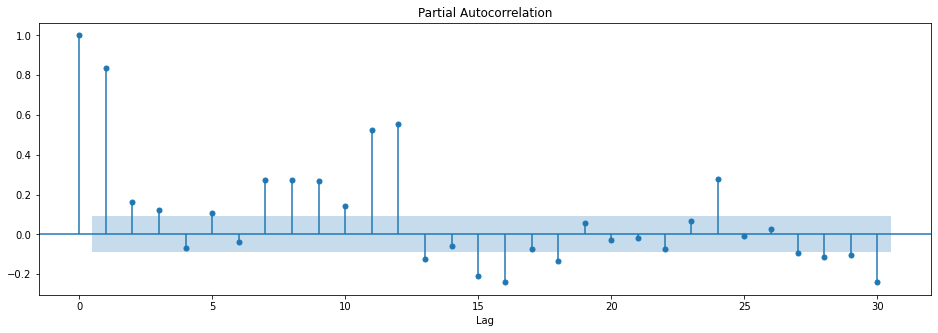

In [60]:
# Partial auto correlation plot
fig, axs = plt.subplots(figsize = (16, 5))
plot_pacf(train['Monthly beer production'], ax = axs, lags = 30)
plt.xlabel('Lag')
plt.show(block = False)

We can observe a very good correlation exists at 12th lag

# Correlation after differencing------------------------------------

## First degree differencing

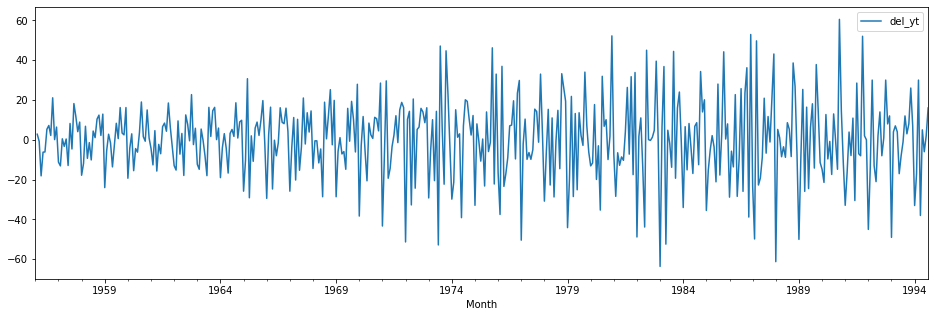

In [31]:
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'del_yt', ax = axs)
plt.show(block = False)

In [75]:
# Mean seems close to constant, but variance is not constantant

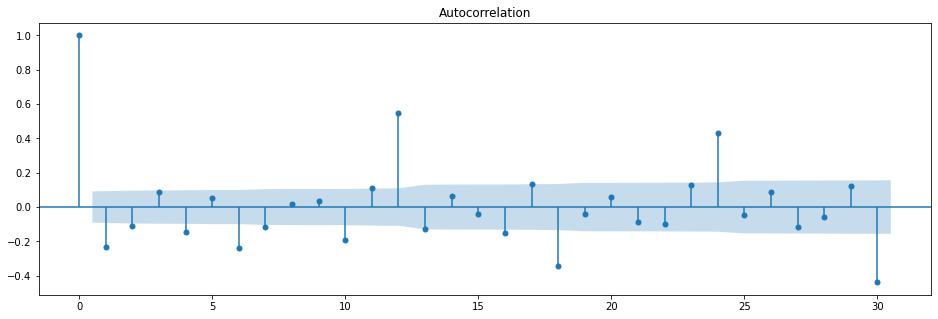

In [32]:
# Checking partial auto correlation with 1st difference
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['del_yt'][1:-1], ax = axs, lags = 30)
plt.show(block = False)

In [ ]:
# The model is not stationary as after differencing also, there is some pattern. It is not totally random.

## ADF test

## 2nd degree diffencing

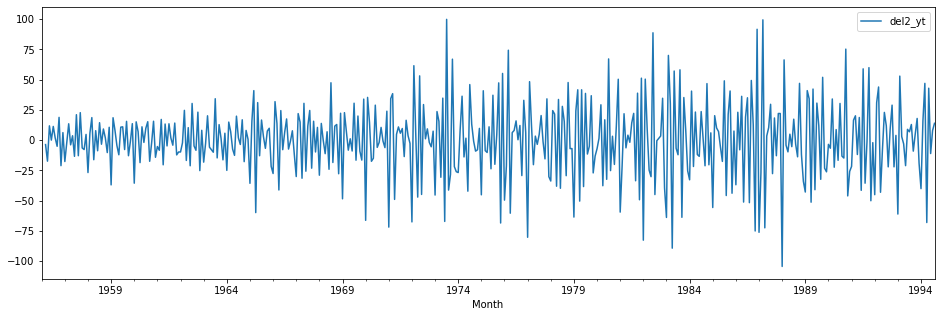

In [33]:
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'del2_yt', ax = axs)
plt.show(block = False)

In [77]:
# Mean seems close to constant, but variance is not constantant

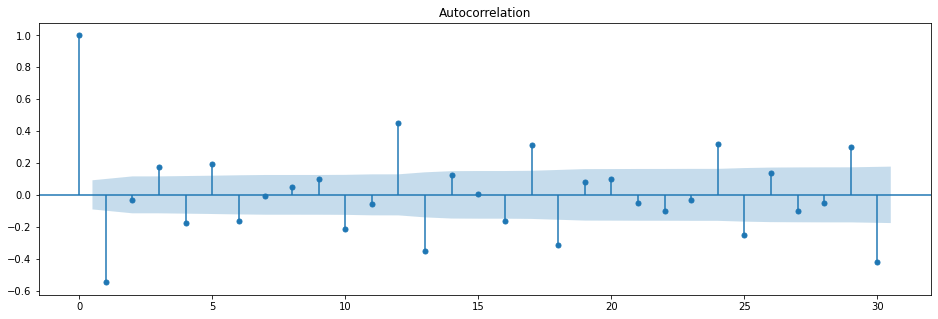

In [34]:
# Checking partial auto correlation with 2nd difference
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['del2_yt'][2:-2], ax = axs, lags = 30)
plt.show(block = False)

In [71]:
# We can see that data has become close to stationary after selecting 2 differencing

In [61]:
# Let's test Augmented Dicky filler test to check the stationarity after first degree and 2nd degree differencing
adf = adfuller(x = train['del_yt'][1:-1])
adf

(-4.759633374514982,
 6.492748754052176e-05,
 18,
 443,
 {'1%': -3.4451978474132234,
  '5%': -2.8680864144212057,
  '10%': -2.5702569996789792},
 3360.2042459010518)

In [62]:
adf = adfuller(x = train['del2_yt'][2:-2])
adf

(-14.479691992307231,
 6.402825774923731e-27,
 18,
 441,
 {'1%': -3.4452655826028318,
  '5%': -2.868116205869215,
  '10%': -2.570272878944473},
 3353.380699320004)

We would go with both first & second differencing to forecast

# ------------------------------------------Modeling---------------------------------------------------

## Checking Random walk by coefficient of AR(1)

In [35]:
model = ARIMA(list(train['Monthly beer production']), order = [1, 0, 0])
model = model.fit()

In [36]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2017.970
Date:                Fri, 29 Sep 2023   AIC                           4041.941
Time:                        00:57:36   BIC                           4054.361
Sample:                             0   HQIC                          4046.830
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.7024      5.894     23.024      0.000     124.151     147.254
ar.L1          0.8339      0.029     28.998      0.000       0.778       0.890
sigma2       349.9209     22.219     15.749      0.0

The data is not random walk as the coefficient is not equals to 1

## Auto-regressive model with lag 12 and 1st difference

In [63]:
model = ARIMA(list(train['Monthly beer production']), order = [12, 1, 0])

In [64]:
model = model.fit()

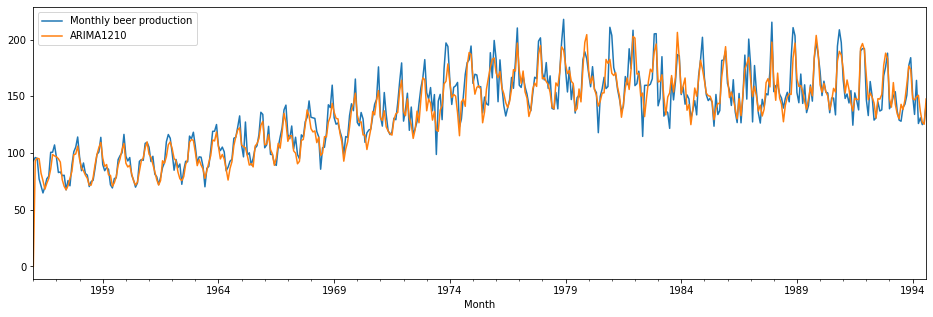

In [65]:
# Cheking the model prediction on the train data
train['ARIMA1210'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA1210', ax = axs)
plt.show(block = False)

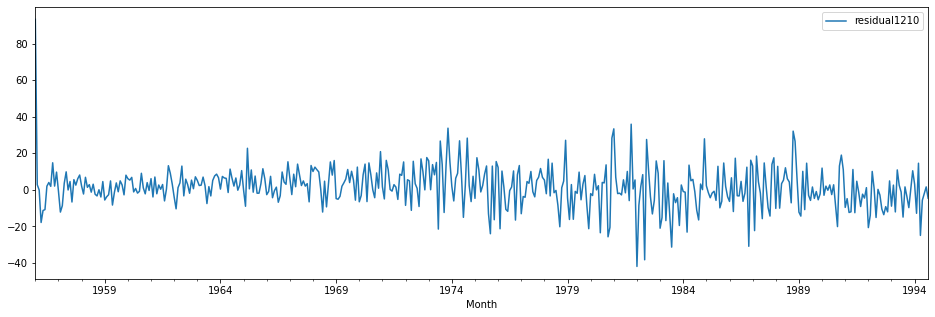

In [66]:
# Plotting residual
train['residual1210'] = train['Monthly beer production'] - train['ARIMA1210']
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'residual1210', ax = axs)
plt.show(block = False)

From the above chart, we can observe a almost constant mean but little inconsistent variance, let's check the correlations

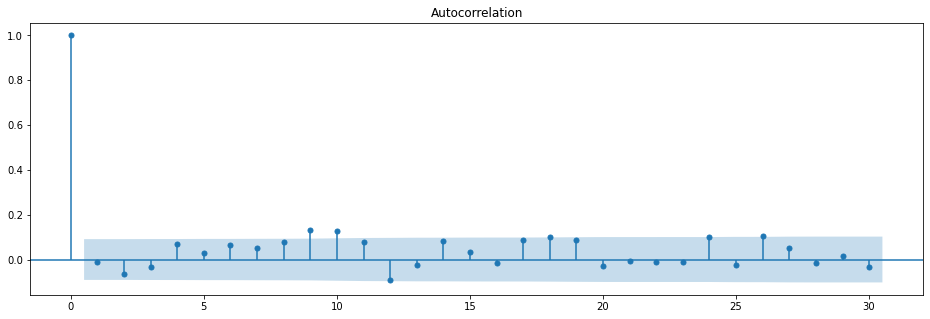

In [67]:
# Checking partial auto correlation with 2nd difference
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['residual1210'], ax = axs, lags = 30)
plt.show(block = False)

In [68]:
# Global mean
train['residual1210'].mean()

1.5320573019270185

We can observe from the above chart that auto-correlation is very less and almost act like a constant, So, The residual is close to white noise

In [40]:
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA1210'])**2, axis = 1).mean()**(1/2)

11.528846022714877

In [41]:
def forecastModel(p, d, q):
    for i in range(len(test_ls)):
        model = ARIMA(train_ls, order = [p, d, q])
        model = model.fit()
        forecast = model.forecast()[0]
        train_ls.append(forecast)
        actual = test_ls[i]
        sqrd_error = (actual-forecast)**2
        rmse_ls.append(sqrd_error)
    return np.mean(rmse_ls)**(1/2), train_ls[-12:]

In [42]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(12, 1, 0)

In [43]:
rmse

10.04502047201626

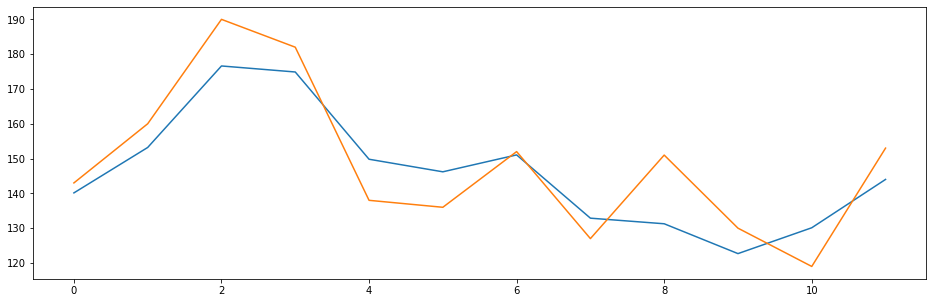

In [44]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## Auto-regressive model with lag 12 and 2nd difference

In [70]:
model = ARIMA(list(train['Monthly beer production']), order = [12, 2, 0])
model = model.fit()

In [71]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:                ARIMA(12, 2, 0)   Log Likelihood               -1847.323
Date:                Fri, 29 Sep 2023   AIC                           3720.646
Time:                        11:43:27   BIC                           3774.408
Sample:                             0   HQIC                          3741.812
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4548      0.037    -39.101      0.000      -1.528      -1.382
ar.L2         -1.5449      0.053    -28.934      0.000      -1.650      -1.440
ar.L3         -1.4650      0.063    -23.169      0.0

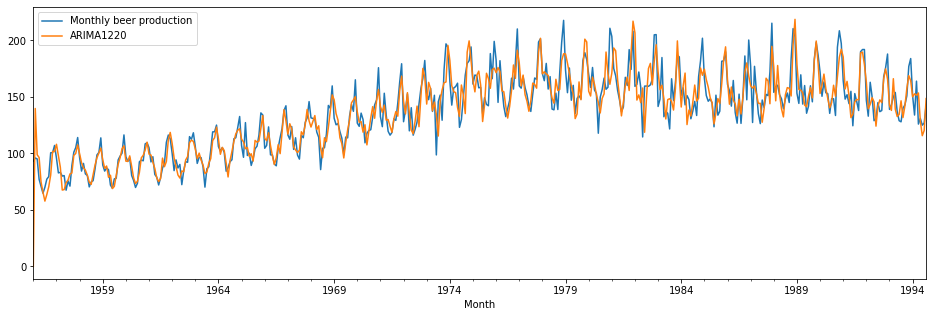

In [72]:
# Cheking the model prediction on the train data
train['ARIMA1220'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA1220', ax = axs)
plt.show(block = False)

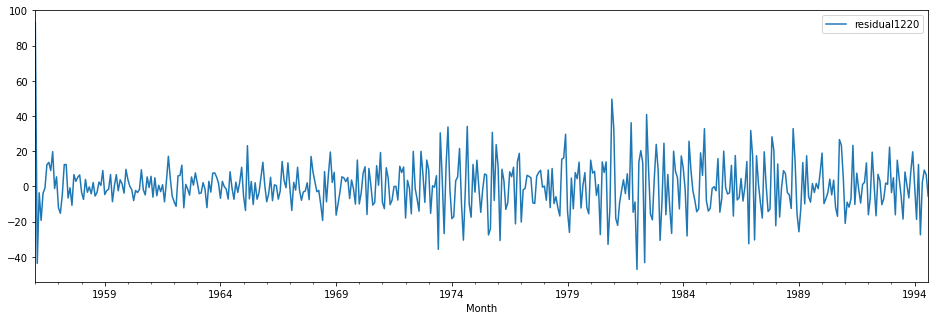

In [73]:
# PLotting residual
train['residual1220'] = train['Monthly beer production'] - train['ARIMA1220']
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'residual1220', ax = axs)
plt.show(block = False)

From the above chart, we can observe a almost constant mean but little inconsistent variance, let's check the correlations

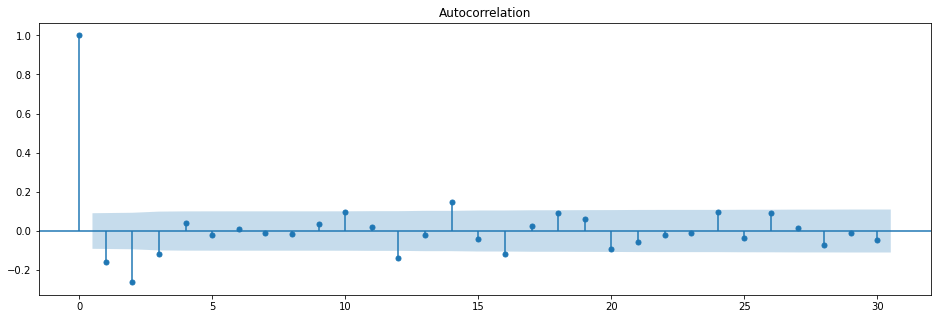

In [74]:
# Checking partial auto correlation with 2nd difference
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['residual1220'], ax = axs, lags = 30)
plt.show(block = False)

In [75]:
train['residual1220'].mean() # Mean is close to 0

0.11793956077457811

We can observe from the above chart that auto-correlation is very less and almost act like a constant, So, The residual is close to white noise, but it is no improvement from ARIMA(12,1, 0) model

In [48]:
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA1220'])**2, axis = 1).mean()**(1/2)

13.9232851254377

In [49]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(12, 2, 0)

In [50]:
rmse

11.770598024383164

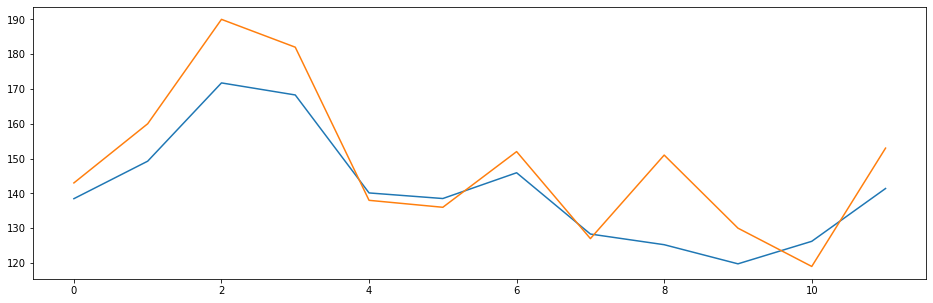

In [51]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## Moving average model with q = 12 and 1st difference

In [52]:
model = ARIMA(list(train['Monthly beer production']), order = [0, 1, 12])
model = model.fit()

In [53]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:                ARIMA(0, 1, 12)   Log Likelihood               -1886.918
Date:                Fri, 29 Sep 2023   AIC                           3799.836
Time:                        01:18:19   BIC                           3853.627
Sample:                             0   HQIC                          3821.012
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5788      0.041    -14.162      0.000      -0.659      -0.499
ma.L2         -0.1152      0.050     -2.323      0.020      -0.212      -0.018
ma.L3          0.0637      0.050      1.272      0.2

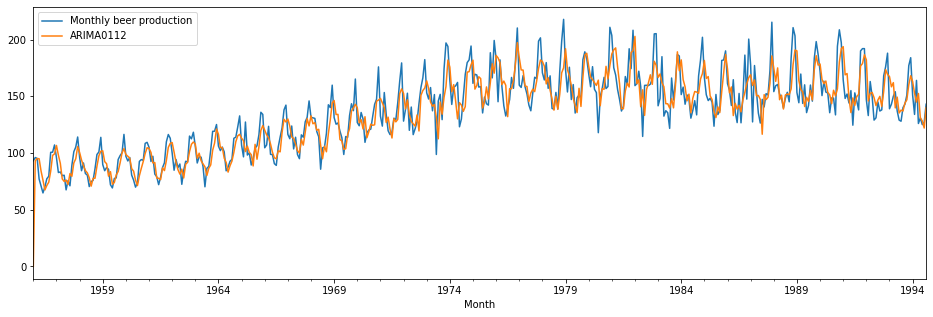

In [54]:
# Cheking the model prediction on the train data
train['ARIMA0112'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA0112', ax = axs)
plt.show(block = False)

In [55]:
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA0112'])**2, axis = 1).mean()**(1/2)

14.812133192946233

In [56]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(0, 1, 12)

In [57]:
rmse

17.94334327542812

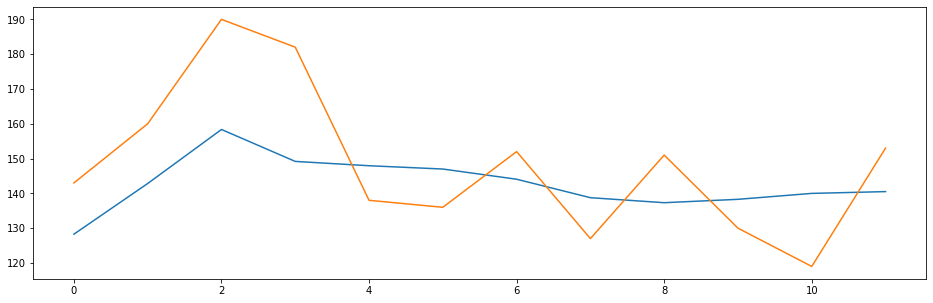

In [58]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## Moving average model with q = 12 and 2nd difference

In [59]:
model = ARIMA(list(train['Monthly beer production']), order = [0, 2, 12])
model = model.fit()

In [60]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:                ARIMA(0, 2, 12)   Log Likelihood               -1901.749
Date:                Fri, 29 Sep 2023   AIC                           3829.499
Time:                        01:21:23   BIC                           3883.261
Sample:                             0   HQIC                          3850.665
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5547      0.272     -5.724      0.000      -2.087      -1.022
ma.L2          0.3828      0.173      2.216      0.027       0.044       0.721
ma.L3          0.3899      0.105      3.703      0.0

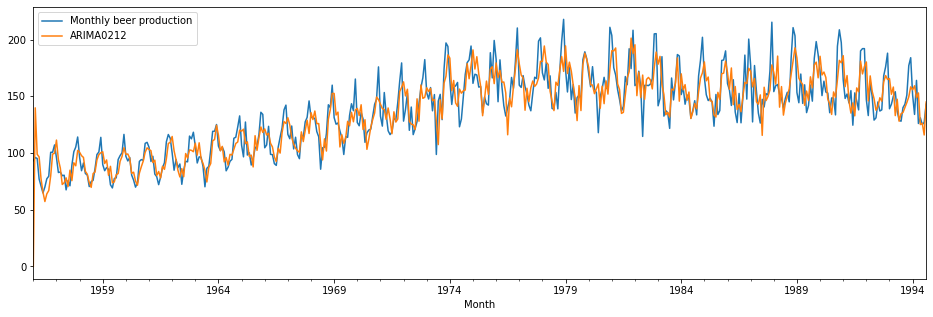

In [61]:
# Cheking the model prediction on the train data
train['ARIMA0212'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA0212', ax = axs)
plt.show(block = False)

In [62]:
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA0212'])**2, axis = 1).mean()**(1/2)

15.388484526775098

In [63]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(0, 2, 12)

In [64]:
rmse

19.111887523693582

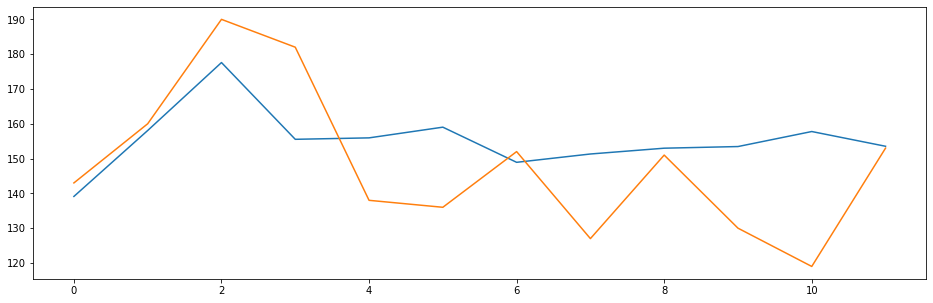

In [65]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## ARIMA model with 12 lag, 1 difference and 12 q

In [77]:
model = ARIMA(list(train['Monthly beer production']), order = [12, 1, 12])
model = model.fit()

In [78]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1705.257
Date:                Fri, 29 Sep 2023   AIC                           3460.513
Time:                        11:47:48   BIC                           3563.957
Sample:                             0   HQIC                          3501.236
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9535      3.138     -0.304      0.761      -7.104       5.197
ar.L2         -0.8953      0.502     -1.782      0.075      -1.880       0.090
ar.L3         -0.8037      2.513     -0.320      0.7

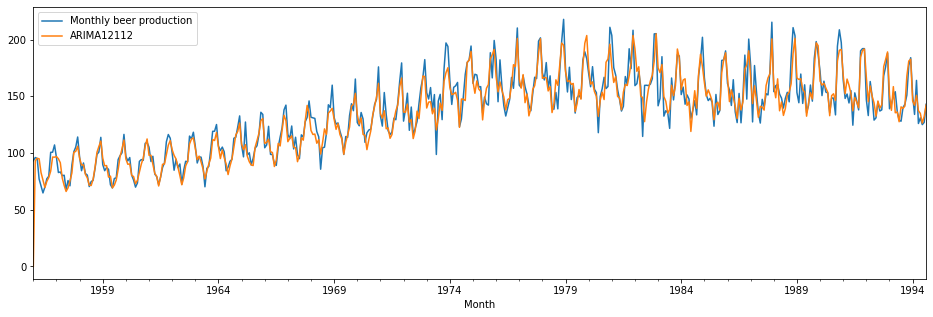

In [79]:
# Cheking the model prediction on the train data
train['ARIMA12112'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA12112', ax = axs)
plt.show(block = False)

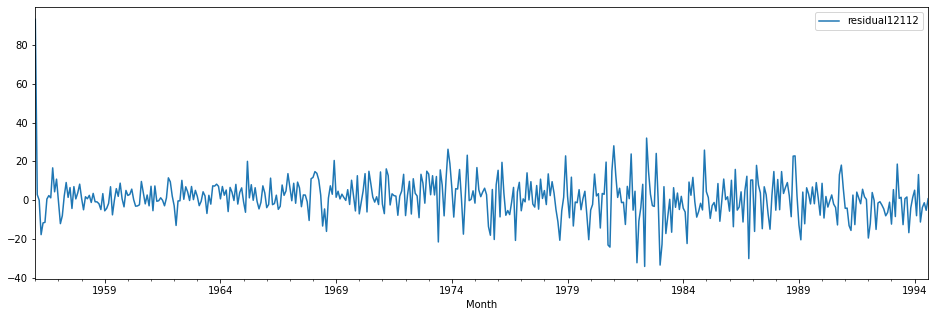

In [80]:
# Plotting residual
train['residual12112'] = train['Monthly beer production'] - train['ARIMA12112']
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'residual12112', ax = axs)
plt.show(block = False)

From the above chart, we can observe a almost constant mean but little inconsistent variance, let's check the correlations

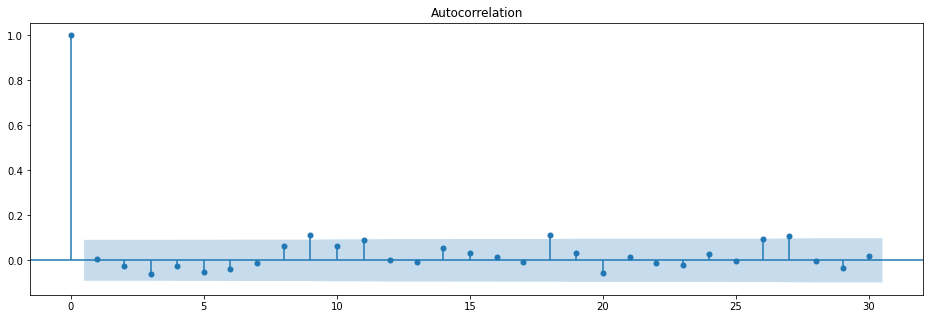

In [81]:
# Checking partial auto correlation with 2nd difference
fig, axs = plt.subplots(figsize = (16, 5))
plot_acf(train['residual12112'], ax = axs, lags = 30)
plt.show(block = False)

In [82]:
# Mean of residual 
train['residual12112'].mean() # Mean is close to 0

1.171046845369934

We can observe from the above chart that auto-correlation is very less and almost act like a constant, So, The residual is close to white noise, but it is improvement from ARIMA(12, 1, 0) model

In [69]:
#Train RMSE
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA12112'])**2, axis = 1).mean()**(1/2)

10.45213268090577

In [70]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(12, 1, 12)

In [71]:
# Test RMSE
rmse

9.395418558588709

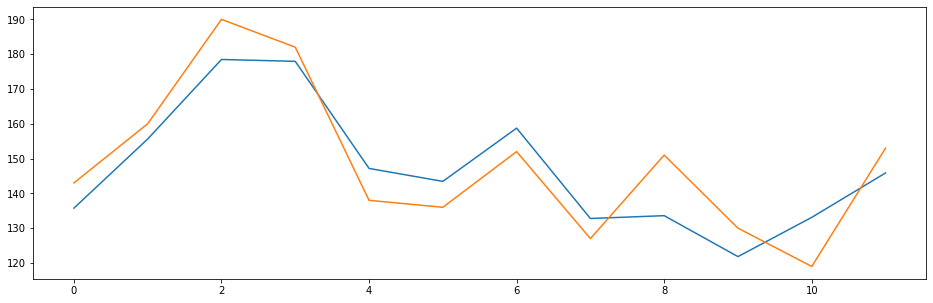

In [73]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## ARIMA model with 12 lag, 2 difference and 12 q

In [72]:
model = ARIMA(list(train['Monthly beer production']), order = [12, 2, 12])
model = model.fit()

In [74]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  464
Model:               ARIMA(12, 2, 12)   Log Likelihood               -1717.623
Date:                Fri, 29 Sep 2023   AIC                           3485.246
Time:                        01:29:14   BIC                           3588.635
Sample:                             0   HQIC                          3525.951
                                - 464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5610      0.506     -3.084      0.002      -2.553      -0.569
ar.L2         -1.4576      0.312     -4.672      0.000      -2.069      -0.846
ar.L3         -1.2944      0.438     -2.954      0.0

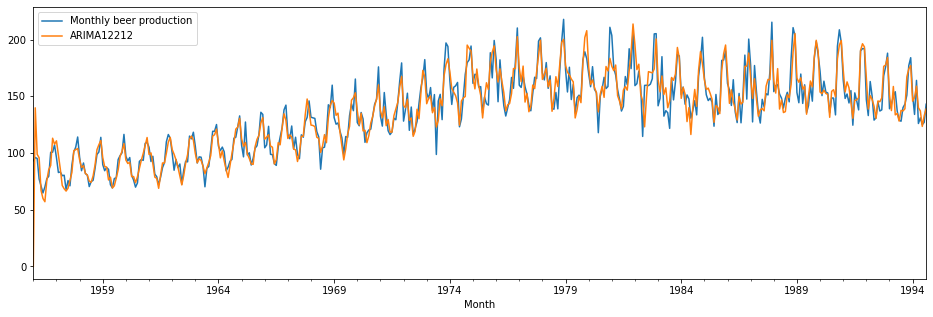

In [75]:
# Cheking the model prediction on the train data
train['ARIMA12212'] = model.predict()
fig, axs = plt.subplots(figsize = (16, 5))
train.plot('Month', 'Monthly beer production', ax = axs)
train.plot('Month', 'ARIMA12212', ax = axs)
plt.show(block = False)

In [76]:
train.apply(lambda x: (x['Monthly beer production'] - x['ARIMA12212'])**2, axis = 1).mean()**(1/2)

10.888047337167754

In [77]:
# Following Walk forward method to forecast the value for test dataset
train_ls = list(train['Monthly beer production'])
test_ls = list(test['Monthly beer production'])
rmse_ls = list()
rmse, forecast = forecastModel(12, 2, 12)

In [78]:
rmse

10.80170632866367

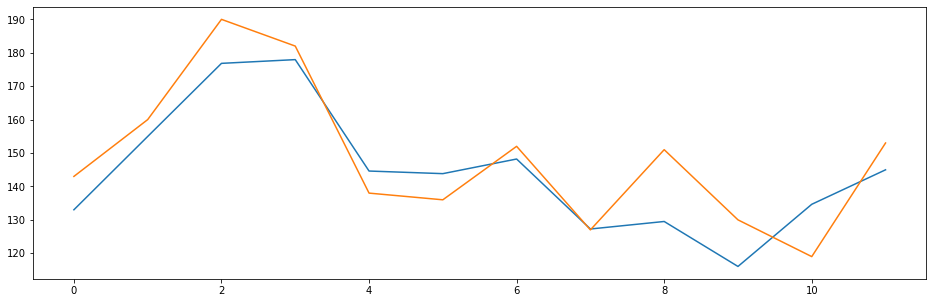

In [15]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = forecast, ax = axs)
sns.lineplot(data = test_ls, ax = axs)
plt.show(block = False)

## Persistent model

In [ ]:
# We will assign previous 12 months data as post 12 months data
forecast = trai

In [37]:
persistant_rmse_ls = list()
for i in range(len(test)):
    diff = train['Monthly beer production'][-12:].reset_index(drop = True)[i] - test['Monthly beer production'].reset_index(drop = True)[i]
    diff2 = diff**2
    persistant_rmse_ls.append(diff2)

In [39]:
np.mean(persistant_rmse_ls)**(1/2)

9.836157786453

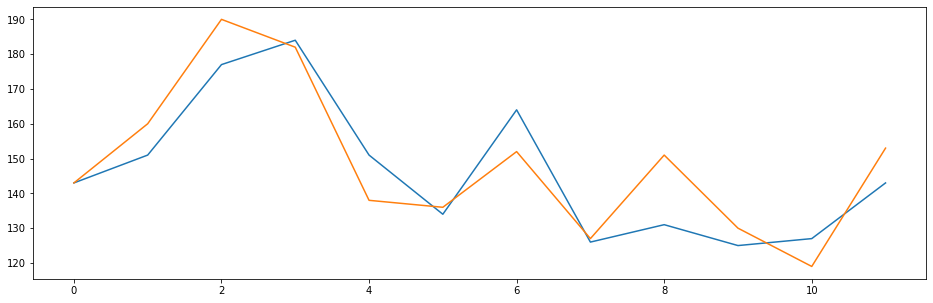

In [41]:
fig, axs = plt.subplots(figsize = (16, 5))
sns.lineplot(data = list(train['Monthly beer production'][-12:]), ax = axs)
sns.lineplot(data = list(test['Monthly beer production']), ax = axs)
plt.show(block = False)

# Result : 

Foreast through 
3rd degree (Multiplicative):  10.8 (Train),   19.0 (Test)
3rd degree (Additive):        11.0 (Train),   19.4 (Test)
4th degree (Multiplicative):  9.80 (Train),   15.8 (Test)
4th degree (Additive):        10.0 (Train),   16.2 (Test)
ARIMA(12, 1, 0):              11.5 (Train),   10.0 (Test)
ARIMA(12, 2, 0):              13.9 (Train),   11.8 (Test)
ARIMA(0, 1, 12):              14.8 (Train),   17.9 (Test)
ARIMA(0, 2, 12):              15.4 (Train),   19.1 (Test)
ARIMA(12, 1, 12):             10.5 (Train),   9.40 (Test)
ARIMA(12, 2, 12):             10.9 (Train),   10.8 (Test)
Persistent:                                   9.84 (Test)

## Conclusion

From the above result we can conclude that good seasonal effect is there as persistent model RMSE is low.
If we want to proceed with a modeling approach then ARIMA(12, 1, 12) model performs better than any other model also having coefficient value |P| <1 in most cases.